## Work
1. 請將 Epoch 加到 500 個，並觀察 learning curve 的走勢
2. 請將 Optimizer 換成 SGD，並觀察 learning curve 的走勢

In [1]:
import os
import keras

import matplotlib.pyplot as plt
%matplotlib inline

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若有 GPU 且想開啟，可設為 "0")
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
train, test = keras.datasets.cifar10.load_data()

In [3]:
# 將 X 與 Y 獨立放進變數
x_train, y_train = train
x_test, y_test = test
# 資料前處理 - 標準化
x_train = x_train / 255.
x_test = x_test / 255.

# 將資料從圖形 (RGB) 轉為向量 (Single Vector)
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

# 將目標轉為 one-hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [4]:
def build_mlp(input_size):
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input(input_size)
    x = keras.layers.Dense(units=512, activation="relu")(input_layer)
    x = keras.layers.Dense(units=256, activation="relu")(x)
    x = keras.layers.Dense(units=128, activation="relu")(x)
    out = keras.layers.Dense(units=10, activation="softmax")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

def exp(optimizer, epochs, x_train, y_train, x_test, y_test):
    model = build_mlp([x_train.shape[-1]])
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)
    
    model.fit(x_train, y_train, 
              epochs=epochs, 
              batch_size=256, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # 以視覺畫方式檢視訓練過程
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]

    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]

    plt.plot(range(len(train_loss)), train_loss, label="train loss")
    plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
    plt.legend()
    plt.title("Loss")
    plt.show()

    plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
    plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
    plt.legend()
    plt.title("Accuracy")
    plt.show()


## Adam:
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Train on 50000 samples, validate on 10000 samples
Epoch 1/500
50000/50000 [==============================] - 4s 83us/step - loss: 1.9461 - acc: 0.3010 - val_loss: 1.7470 - val_acc: 0.3813
Epoch 2/500
50000/50000 [==============================] - 4s 77us/step - loss: 1.7095 - acc: 0.3900 - val_loss: 1.6710 - val_acc: 0.4038
Epoch 3/500
50000/50000 [==============================] - 4s 76us/step - loss: 1.6288 - acc: 0.4177 - val_loss: 1.5702 - val_acc: 0.4420
Epoch 4/500
50000/50000 [==============================] - 4s 77us/step - loss: 1.5558 - acc: 0.4463 - val_loss: 1.5181 - val_acc: 0.4586
Epoch 5/500
50000/50000 [==============================] - 4s 76us/step - loss: 1.5088 - acc: 0.4617 - val_loss: 1.5081 - val_acc: 0.4706
Epoch 6/500
50000/50000 [==============================] - 4s 76us/step - loss: 1.4600 - acc: 0.4799 - val_loss: 1.5050 - val_acc: 

50000/50000 [==============================] - 4s 76us/step - loss: 0.5718 - acc: 0.7949 - val_loss: 1.9385 - val_acc: 0.5067
Epoch 56/500
50000/50000 [==============================] - 4s 76us/step - loss: 0.5790 - acc: 0.7925 - val_loss: 1.9380 - val_acc: 0.5168
Epoch 57/500
50000/50000 [==============================] - 4s 76us/step - loss: 0.5557 - acc: 0.8013 - val_loss: 1.9839 - val_acc: 0.5152
Epoch 58/500
50000/50000 [==============================] - 4s 76us/step - loss: 0.5500 - acc: 0.8039 - val_loss: 1.9689 - val_acc: 0.5091
Epoch 59/500
50000/50000 [==============================] - 4s 76us/step - loss: 0.5436 - acc: 0.8041 - val_loss: 1.9649 - val_acc: 0.5199
Epoch 60/500
50000/50000 [==============================] - 4s 76us/step - loss: 0.5201 - acc: 0.8145 - val_loss: 2.0509 - val_acc: 0.5077
Epoch 61/500
50000/50000 [==============================] - 4s 76us/step - loss: 0.5131 - acc: 0.8154 - val_loss: 2.0375 - val_acc: 0.5222
Epoch 62/500
50000/50000 [==============

Epoch 114/500
50000/50000 [==============================] - 4s 76us/step - loss: 0.2349 - acc: 0.9163 - val_loss: 3.3870 - val_acc: 0.4937
Epoch 115/500
50000/50000 [==============================] - 4s 76us/step - loss: 0.2416 - acc: 0.9129 - val_loss: 3.4271 - val_acc: 0.4933
Epoch 116/500
50000/50000 [==============================] - 4s 76us/step - loss: 0.2437 - acc: 0.9127 - val_loss: 3.3965 - val_acc: 0.4976
Epoch 117/500
50000/50000 [==============================] - 4s 76us/step - loss: 0.2399 - acc: 0.9142 - val_loss: 3.4604 - val_acc: 0.5040
Epoch 118/500
50000/50000 [==============================] - 4s 77us/step - loss: 0.2210 - acc: 0.9213 - val_loss: 3.4985 - val_acc: 0.5012
Epoch 119/500
50000/50000 [==============================] - 4s 76us/step - loss: 0.2693 - acc: 0.9017 - val_loss: 3.4180 - val_acc: 0.4950
Epoch 120/500
50000/50000 [==============================] - 4s 76us/step - loss: 0.2305 - acc: 0.9175 - val_loss: 3.4226 - val_acc: 0.5004
Epoch 121/500
50000/

50000/50000 [==============================] - 4s 76us/step - loss: 0.1564 - acc: 0.9443 - val_loss: 4.2158 - val_acc: 0.4900
Epoch 173/500
50000/50000 [==============================] - 4s 76us/step - loss: 0.1714 - acc: 0.9402 - val_loss: 4.1705 - val_acc: 0.4939
Epoch 174/500
50000/50000 [==============================] - 4s 76us/step - loss: 0.1291 - acc: 0.9552 - val_loss: 4.1726 - val_acc: 0.4925
Epoch 175/500
50000/50000 [==============================] - 4s 76us/step - loss: 0.1040 - acc: 0.9638 - val_loss: 4.2715 - val_acc: 0.4842
Epoch 176/500
50000/50000 [==============================] - 4s 76us/step - loss: 0.1768 - acc: 0.9376 - val_loss: 4.3691 - val_acc: 0.4874
Epoch 177/500
50000/50000 [==============================] - 4s 76us/step - loss: 0.1908 - acc: 0.9339 - val_loss: 4.2827 - val_acc: 0.4909
Epoch 178/500
50000/50000 [==============================] - 4s 77us/step - loss: 0.2064 - acc: 0.9282 - val_loss: 4.2685 - val_acc: 0.4861
Epoch 179/500
50000/50000 [=======

50000/50000 [==============================] - 4s 76us/step - loss: 0.1008 - acc: 0.9641 - val_loss: 4.6281 - val_acc: 0.4923
Epoch 231/500
50000/50000 [==============================] - 4s 76us/step - loss: 0.1968 - acc: 0.9356 - val_loss: 4.6690 - val_acc: 0.4831
Epoch 232/500
50000/50000 [==============================] - 4s 76us/step - loss: 0.2334 - acc: 0.9251 - val_loss: 4.5317 - val_acc: 0.4914
Epoch 233/500
50000/50000 [==============================] - 4s 76us/step - loss: 0.1089 - acc: 0.9609 - val_loss: 4.6370 - val_acc: 0.4946
Epoch 234/500
50000/50000 [==============================] - 4s 76us/step - loss: 0.1017 - acc: 0.9645 - val_loss: 4.6294 - val_acc: 0.4935
Epoch 235/500
50000/50000 [==============================] - 4s 76us/step - loss: 0.1040 - acc: 0.9640 - val_loss: 4.6780 - val_acc: 0.4895
Epoch 236/500
50000/50000 [==============================] - 4s 76us/step - loss: 0.1585 - acc: 0.9455 - val_loss: 4.6033 - val_acc: 0.4895
Epoch 237/500
50000/50000 [=======

50000/50000 [==============================] - 4s 76us/step - loss: 0.1160 - acc: 0.9599 - val_loss: 5.0093 - val_acc: 0.4853
Epoch 289/500
50000/50000 [==============================] - 4s 76us/step - loss: 0.1231 - acc: 0.9587 - val_loss: 4.9312 - val_acc: 0.4860
Epoch 290/500
50000/50000 [==============================] - 4s 76us/step - loss: 0.1275 - acc: 0.9571 - val_loss: 4.9730 - val_acc: 0.4878
Epoch 291/500
50000/50000 [==============================] - 4s 76us/step - loss: 0.1408 - acc: 0.9530 - val_loss: 4.8864 - val_acc: 0.4906
Epoch 292/500
50000/50000 [==============================] - 4s 76us/step - loss: 0.0842 - acc: 0.9709 - val_loss: 4.9360 - val_acc: 0.4929
Epoch 293/500
50000/50000 [==============================] - 4s 77us/step - loss: 0.0804 - acc: 0.9723 - val_loss: 4.8711 - val_acc: 0.4927
Epoch 294/500
50000/50000 [==============================] - 4s 76us/step - loss: 0.1207 - acc: 0.9589 - val_loss: 5.0160 - val_acc: 0.4827
Epoch 295/500
50000/50000 [=======

50000/50000 [==============================] - 4s 76us/step - loss: 0.1475 - acc: 0.9531 - val_loss: 5.0088 - val_acc: 0.4905
Epoch 347/500
50000/50000 [==============================] - 4s 76us/step - loss: 0.1498 - acc: 0.9518 - val_loss: 5.0385 - val_acc: 0.4906
Epoch 348/500
50000/50000 [==============================] - 4s 76us/step - loss: 0.1206 - acc: 0.9601 - val_loss: 4.9700 - val_acc: 0.5013
Epoch 349/500
50000/50000 [==============================] - 4s 76us/step - loss: 0.0962 - acc: 0.9675 - val_loss: 4.9763 - val_acc: 0.4948
Epoch 350/500
50000/50000 [==============================] - 4s 77us/step - loss: 0.0624 - acc: 0.9779 - val_loss: 5.0616 - val_acc: 0.4939
Epoch 351/500
50000/50000 [==============================] - 4s 76us/step - loss: 0.0758 - acc: 0.9749 - val_loss: 4.9946 - val_acc: 0.4939
Epoch 352/500
50000/50000 [==============================] - 4s 76us/step - loss: 0.1133 - acc: 0.9624 - val_loss: 5.1075 - val_acc: 0.4885
Epoch 353/500
50000/50000 [=======

50000/50000 [==============================] - 4s 76us/step - loss: 0.0638 - acc: 0.9789 - val_loss: 5.2613 - val_acc: 0.4947
Epoch 405/500
50000/50000 [==============================] - 4s 76us/step - loss: 0.1022 - acc: 0.9657 - val_loss: 5.1519 - val_acc: 0.4996
Epoch 406/500
50000/50000 [==============================] - 4s 76us/step - loss: 0.1130 - acc: 0.9639 - val_loss: 5.2635 - val_acc: 0.4924
Epoch 407/500
50000/50000 [==============================] - 4s 76us/step - loss: 0.1073 - acc: 0.9656 - val_loss: 5.1854 - val_acc: 0.4974
Epoch 408/500
50000/50000 [==============================] - 4s 76us/step - loss: 0.0797 - acc: 0.9737 - val_loss: 5.2397 - val_acc: 0.4936
Epoch 409/500
50000/50000 [==============================] - 4s 76us/step - loss: 0.1049 - acc: 0.9659 - val_loss: 5.1701 - val_acc: 0.4927
Epoch 410/500
50000/50000 [==============================] - 4s 76us/step - loss: 0.1113 - acc: 0.9637 - val_loss: 5.1973 - val_acc: 0.4965
Epoch 411/500
50000/50000 [=======

50000/50000 [==============================] - 4s 76us/step - loss: 0.0575 - acc: 0.9805 - val_loss: 5.3874 - val_acc: 0.4916
Epoch 463/500
50000/50000 [==============================] - 4s 76us/step - loss: 0.1730 - acc: 0.9494 - val_loss: 5.3082 - val_acc: 0.4846
Epoch 464/500
50000/50000 [==============================] - 4s 76us/step - loss: 0.1127 - acc: 0.9637 - val_loss: 5.2703 - val_acc: 0.4895
Epoch 465/500
50000/50000 [==============================] - 4s 76us/step - loss: 0.0700 - acc: 0.9768 - val_loss: 5.2753 - val_acc: 0.4930
Epoch 466/500
50000/50000 [==============================] - 4s 76us/step - loss: 0.0605 - acc: 0.9795 - val_loss: 5.3235 - val_acc: 0.4887
Epoch 467/500
50000/50000 [==============================] - 4s 76us/step - loss: 0.0718 - acc: 0.9764 - val_loss: 5.2868 - val_acc: 0.4913
Epoch 468/500
50000/50000 [==============================] - 4s 76us/step - loss: 0.0352 - acc: 0.9879 - val_loss: 5.3430 - val_acc: 0.4951
Epoch 469/500
50000/50000 [=======

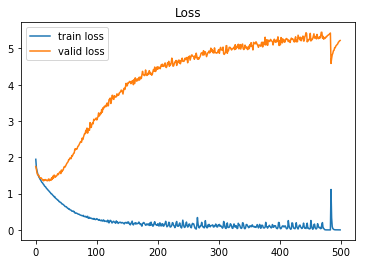

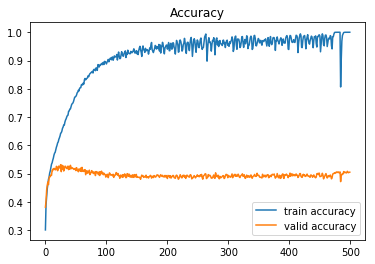

In [5]:
print('## Adam:')
opt = keras.optimizers.Adam(lr=0.001)
exp(opt, 500, x_train, y_train, x_test, y_test)

## SGD:
Train on 50000 samples, validate on 10000 samples
Epoch 1/500
50000/50000 [==============================] - 3s 67us/step - loss: 2.0706 - acc: 0.2635 - val_loss: 1.9543 - val_acc: 0.3021
Epoch 2/500
50000/50000 [==============================] - 3s 64us/step - loss: 1.8855 - acc: 0.3334 - val_loss: 1.8721 - val_acc: 0.3377
Epoch 3/500
50000/50000 [==============================] - 3s 64us/step - loss: 1.8149 - acc: 0.3566 - val_loss: 2.0180 - val_acc: 0.2950
Epoch 4/500
50000/50000 [==============================] - 3s 64us/step - loss: 1.7712 - acc: 0.3757 - val_loss: 1.7887 - val_acc: 0.3700
Epoch 5/500
50000/50000 [==============================] - 3s 64us/step - loss: 1.7314 - acc: 0.3911 - val_loss: 1.7970 - val_acc: 0.3570
Epoch 6/500
50000/50000 [==============================] - 3s 64us/step - loss: 1.7018 - acc: 0.4040 - val_loss: 1.7441 - val_acc: 0.3918
Epoch 7/500
50000/50000 [==============================] - 3s 64us/step - loss: 1.6698 - acc: 0.4134 - val_loss: 1

50000/50000 [==============================] - 3s 64us/step - loss: 1.1743 - acc: 0.5886 - val_loss: 1.3909 - val_acc: 0.5130
Epoch 60/500
50000/50000 [==============================] - 3s 64us/step - loss: 1.1678 - acc: 0.5919 - val_loss: 1.4292 - val_acc: 0.4973
Epoch 61/500
50000/50000 [==============================] - 3s 64us/step - loss: 1.1608 - acc: 0.5933 - val_loss: 1.3974 - val_acc: 0.4986
Epoch 62/500
50000/50000 [==============================] - 3s 65us/step - loss: 1.1604 - acc: 0.5946 - val_loss: 1.3507 - val_acc: 0.5229
Epoch 63/500
50000/50000 [==============================] - 3s 64us/step - loss: 1.1485 - acc: 0.5976 - val_loss: 1.3951 - val_acc: 0.5110
Epoch 64/500
50000/50000 [==============================] - 3s 64us/step - loss: 1.1420 - acc: 0.6006 - val_loss: 1.3730 - val_acc: 0.5199
Epoch 65/500
50000/50000 [==============================] - 3s 64us/step - loss: 1.1371 - acc: 0.6022 - val_loss: 1.4308 - val_acc: 0.4991
Epoch 66/500
50000/50000 [==============

Epoch 118/500
50000/50000 [==============================] - 3s 64us/step - loss: 0.8574 - acc: 0.7035 - val_loss: 1.4952 - val_acc: 0.5007
Epoch 119/500
50000/50000 [==============================] - 3s 64us/step - loss: 0.8515 - acc: 0.7036 - val_loss: 1.5356 - val_acc: 0.4926
Epoch 120/500
50000/50000 [==============================] - 3s 64us/step - loss: 0.8381 - acc: 0.7107 - val_loss: 1.7054 - val_acc: 0.4440
Epoch 121/500
50000/50000 [==============================] - 3s 64us/step - loss: 0.8431 - acc: 0.7100 - val_loss: 1.7560 - val_acc: 0.4436
Epoch 122/500
50000/50000 [==============================] - 3s 64us/step - loss: 0.8315 - acc: 0.7113 - val_loss: 1.5142 - val_acc: 0.5018
Epoch 123/500
50000/50000 [==============================] - 3s 64us/step - loss: 0.8228 - acc: 0.7140 - val_loss: 1.3985 - val_acc: 0.5343
Epoch 124/500
50000/50000 [==============================] - 3s 64us/step - loss: 0.8232 - acc: 0.7157 - val_loss: 1.3765 - val_acc: 0.5421
Epoch 125/500
50000/

50000/50000 [==============================] - 3s 64us/step - loss: 0.5701 - acc: 0.8082 - val_loss: 1.5194 - val_acc: 0.5373
Epoch 177/500
50000/50000 [==============================] - 3s 64us/step - loss: 0.5700 - acc: 0.8076 - val_loss: 1.5748 - val_acc: 0.5278
Epoch 178/500
50000/50000 [==============================] - 3s 64us/step - loss: 0.5607 - acc: 0.8142 - val_loss: 1.6135 - val_acc: 0.5129
Epoch 179/500
50000/50000 [==============================] - 3s 64us/step - loss: 0.5488 - acc: 0.8154 - val_loss: 1.9200 - val_acc: 0.4743
Epoch 180/500
50000/50000 [==============================] - 3s 64us/step - loss: 0.5542 - acc: 0.8145 - val_loss: 1.6703 - val_acc: 0.5139
Epoch 181/500
50000/50000 [==============================] - 3s 64us/step - loss: 0.5228 - acc: 0.8247 - val_loss: 2.0027 - val_acc: 0.4549
Epoch 182/500
50000/50000 [==============================] - 3s 64us/step - loss: 0.5235 - acc: 0.8265 - val_loss: 1.7093 - val_acc: 0.5044
Epoch 183/500
50000/50000 [=======

50000/50000 [==============================] - 3s 64us/step - loss: 0.3045 - acc: 0.9060 - val_loss: 1.8947 - val_acc: 0.5291
Epoch 235/500
50000/50000 [==============================] - 3s 64us/step - loss: 0.3237 - acc: 0.9002 - val_loss: 1.9513 - val_acc: 0.5345
Epoch 236/500
50000/50000 [==============================] - 3s 64us/step - loss: 0.2917 - acc: 0.9099 - val_loss: 1.8995 - val_acc: 0.5259
Epoch 237/500
50000/50000 [==============================] - 3s 64us/step - loss: 0.2810 - acc: 0.9140 - val_loss: 2.4089 - val_acc: 0.4929
Epoch 238/500
50000/50000 [==============================] - 3s 64us/step - loss: 0.3299 - acc: 0.8982 - val_loss: 2.2559 - val_acc: 0.5076
Epoch 239/500
50000/50000 [==============================] - 3s 64us/step - loss: 0.3105 - acc: 0.9032 - val_loss: 1.9124 - val_acc: 0.5271
Epoch 240/500
50000/50000 [==============================] - 3s 64us/step - loss: 0.2830 - acc: 0.9143 - val_loss: 2.0270 - val_acc: 0.5204
Epoch 241/500
50000/50000 [=======

50000/50000 [==============================] - 3s 64us/step - loss: 0.1284 - acc: 0.9704 - val_loss: 2.3187 - val_acc: 0.5099
Epoch 293/500
50000/50000 [==============================] - 3s 64us/step - loss: 0.2410 - acc: 0.9380 - val_loss: 2.2044 - val_acc: 0.5391
Epoch 294/500
50000/50000 [==============================] - 3s 64us/step - loss: 0.1491 - acc: 0.9626 - val_loss: 2.2687 - val_acc: 0.5394
Epoch 295/500
50000/50000 [==============================] - 3s 64us/step - loss: 0.1135 - acc: 0.9758 - val_loss: 2.2615 - val_acc: 0.5264
Epoch 296/500
50000/50000 [==============================] - 3s 64us/step - loss: 0.1802 - acc: 0.9567 - val_loss: 2.3354 - val_acc: 0.5302
Epoch 297/500
50000/50000 [==============================] - 3s 64us/step - loss: 0.1506 - acc: 0.9648 - val_loss: 2.2977 - val_acc: 0.5298
Epoch 298/500
50000/50000 [==============================] - 3s 64us/step - loss: 0.0975 - acc: 0.9791 - val_loss: 2.3239 - val_acc: 0.5225
Epoch 299/500
50000/50000 [=======

50000/50000 [==============================] - 3s 64us/step - loss: 0.0506 - acc: 0.9940 - val_loss: 2.5451 - val_acc: 0.5411
Epoch 351/500
50000/50000 [==============================] - 3s 64us/step - loss: 0.0419 - acc: 0.9956 - val_loss: 2.5189 - val_acc: 0.5442
Epoch 352/500
50000/50000 [==============================] - 3s 64us/step - loss: 0.3931 - acc: 0.9120 - val_loss: 2.4193 - val_acc: 0.5410
Epoch 353/500
50000/50000 [==============================] - 3s 64us/step - loss: 0.0523 - acc: 0.9931 - val_loss: 2.4911 - val_acc: 0.5448
Epoch 354/500
50000/50000 [==============================] - 3s 64us/step - loss: 0.0406 - acc: 0.9963 - val_loss: 2.5445 - val_acc: 0.5365
Epoch 355/500
50000/50000 [==============================] - 3s 64us/step - loss: 0.0379 - acc: 0.9966 - val_loss: 2.5127 - val_acc: 0.5455
Epoch 356/500
50000/50000 [==============================] - 3s 64us/step - loss: 0.0370 - acc: 0.9966 - val_loss: 2.5260 - val_acc: 0.5433
Epoch 357/500
50000/50000 [=======

50000/50000 [==============================] - 3s 64us/step - loss: 0.0132 - acc: 0.9997 - val_loss: 2.8817 - val_acc: 0.5407
Epoch 409/500
50000/50000 [==============================] - 3s 64us/step - loss: 0.0129 - acc: 0.9998 - val_loss: 2.8906 - val_acc: 0.5435
Epoch 410/500
50000/50000 [==============================] - 3s 64us/step - loss: 0.0130 - acc: 0.9997 - val_loss: 2.8791 - val_acc: 0.5433
Epoch 411/500
50000/50000 [==============================] - 3s 64us/step - loss: 0.0126 - acc: 0.9998 - val_loss: 2.9009 - val_acc: 0.5417
Epoch 412/500
50000/50000 [==============================] - 3s 64us/step - loss: 0.0125 - acc: 0.9998 - val_loss: 2.8908 - val_acc: 0.5424
Epoch 413/500
50000/50000 [==============================] - 3s 64us/step - loss: 0.0123 - acc: 0.9997 - val_loss: 2.9081 - val_acc: 0.5391
Epoch 414/500
50000/50000 [==============================] - 3s 64us/step - loss: 0.0120 - acc: 0.9998 - val_loss: 2.9034 - val_acc: 0.5425
Epoch 415/500
50000/50000 [=======

50000/50000 [==============================] - 3s 64us/step - loss: 0.0068 - acc: 1.0000 - val_loss: 3.0869 - val_acc: 0.5418
Epoch 467/500
50000/50000 [==============================] - 3s 64us/step - loss: 0.0067 - acc: 1.0000 - val_loss: 3.0931 - val_acc: 0.5416
Epoch 468/500
50000/50000 [==============================] - 3s 64us/step - loss: 0.0066 - acc: 1.0000 - val_loss: 3.0987 - val_acc: 0.5438
Epoch 469/500
50000/50000 [==============================] - 3s 64us/step - loss: 0.0066 - acc: 1.0000 - val_loss: 3.0982 - val_acc: 0.5446
Epoch 470/500
50000/50000 [==============================] - 3s 62us/step - loss: 0.0065 - acc: 1.0000 - val_loss: 3.1060 - val_acc: 0.5421
Epoch 471/500
50000/50000 [==============================] - 3s 63us/step - loss: 0.0064 - acc: 1.0000 - val_loss: 3.0986 - val_acc: 0.5412
Epoch 472/500
50000/50000 [==============================] - 3s 62us/step - loss: 0.0065 - acc: 1.0000 - val_loss: 3.1047 - val_acc: 0.5423
Epoch 473/500
50000/50000 [=======

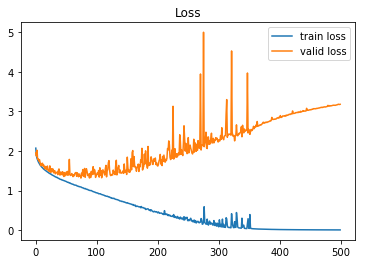

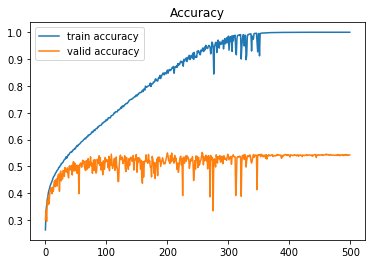

In [6]:
print('## SGD:')
opt = 'SGD'
exp(opt, 500, x_train, y_train, x_test, y_test)